In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nobel = pd.read_csv('/content/sample_data/nobel (2).csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [ ]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

# Conocer el conjunto de forma general

Lo primero que vamos a hacer es reporndernos las siguientes preguntas

- Cuántos premios tenemos registrados? Existen en este conjunto *911* premios
- Cuántos premios han ganados hombres y mujeres? - Hombres tienen *836* premios y las mujeres solamente tienen *49*
-Que países han ganado más premios? - *EEUU* Ocupa el prmer lugar como el país con más premios
-Que categoria tiene más premios? - La categoría con más premios es medicina

In [ ]:
display(len(nobel))

display(nobel['sex'].value_counts())


display(nobel['birth_country'].value_counts().head(10))


nobel['category'].value_counts().head(10)

911

,count
sex,
Male,836
Female,49


,count
birth_country,
United States of America,259
United Kingdom,85
Germany,61
France,51
Sweden,29
Japan,24
Canada,18
Netherlands,18
Italy,17


,count
category,
Medicine,211
Physics,204
Chemistry,175
Peace,130
Literature,113
Economics,78


# Qué porcentaje de ganadores tiene EEUU por década?

Conociendo que EEUU es el país que más ha ganado, conoceremos el porcentaje de victoria que han tednido por decada.

In [ ]:
nobel['usa_born_winner'] = nobel['birth_country'] == "United States of America"
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False


In [ ]:
nobel['decade'] = (np.floor(nobel['year'] /10) *10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

In [ ]:
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


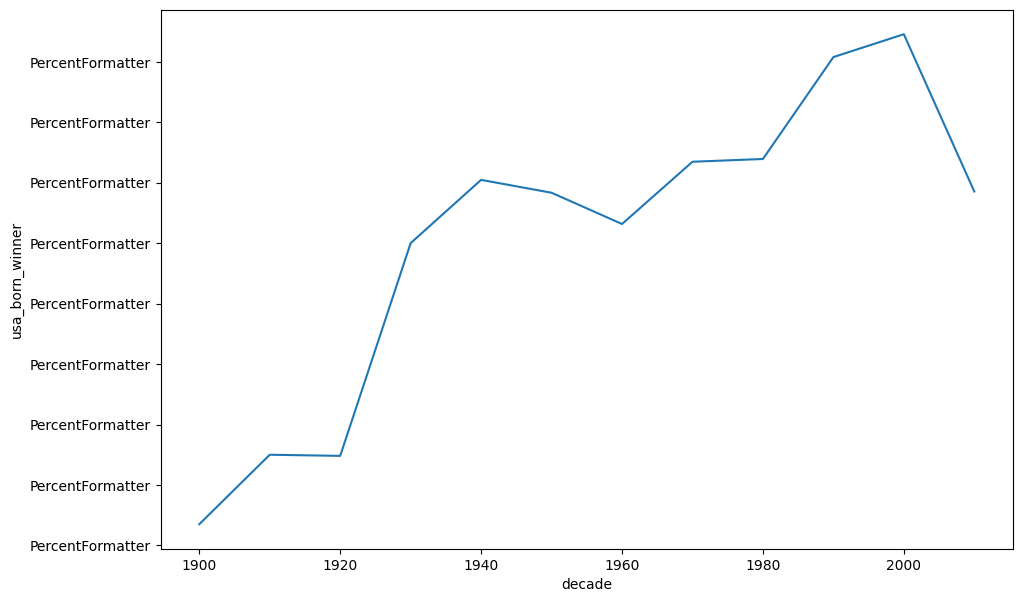

In [ ]:
plt.rcParams['figure.figsize'] = [11,7]

ax = sns.lineplot(
  x ='decade',
  y ='usa_born_winner',
  data= prop_usa_winners
)

from matplotlib.ticker import PercentFormatter

ax.yaxis.set_major_formatter('PercentFormatter')

Cuál es el porcentaje de victoria entre hombres y mujeres en las distintas categorias?

In [ ]:
nobel['Female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['Female_winner'].mean()

prop_female_winners

,decade,category,Female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


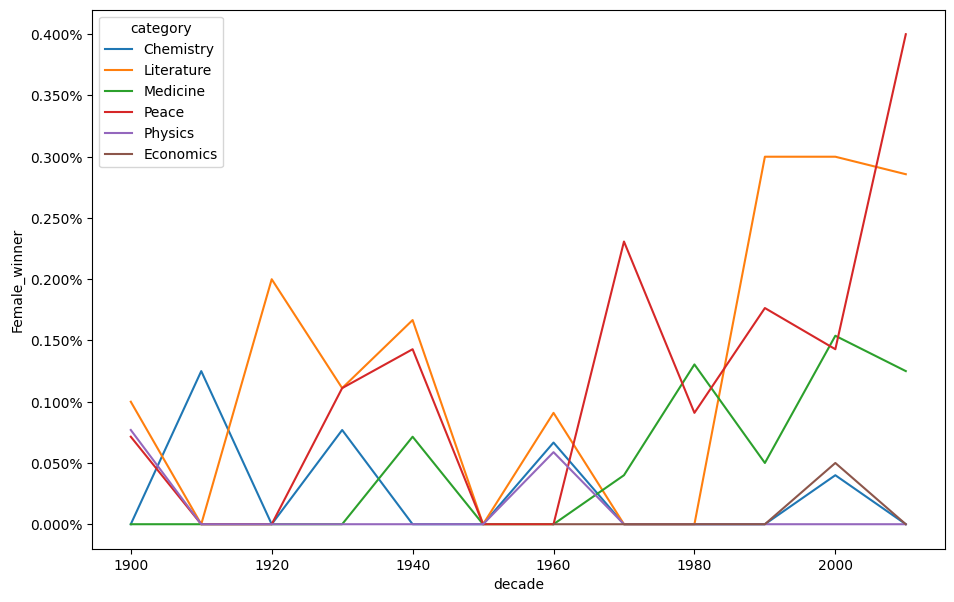

In [ ]:
ax = sns.lineplot(
    x = 'decade',
    y = 'Female_winner',
    data=prop_female_winners,
    hue='category'
)

ax.yaxis.set_major_formatter(PercentFormatter())

- Las categorias en donde menos ha ganado son las siguientes:

- Física
- Química
- Economía
- Lascategorias en donde las mujeres han ganado más son las siguientes:

- Literatura
- Medicina
- Paz

Edad hay más ganadores

In [ ]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birt_date,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1852-08-30,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1839-03-16,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1854-03-15,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1828-05-08,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1822-05-20,79.0


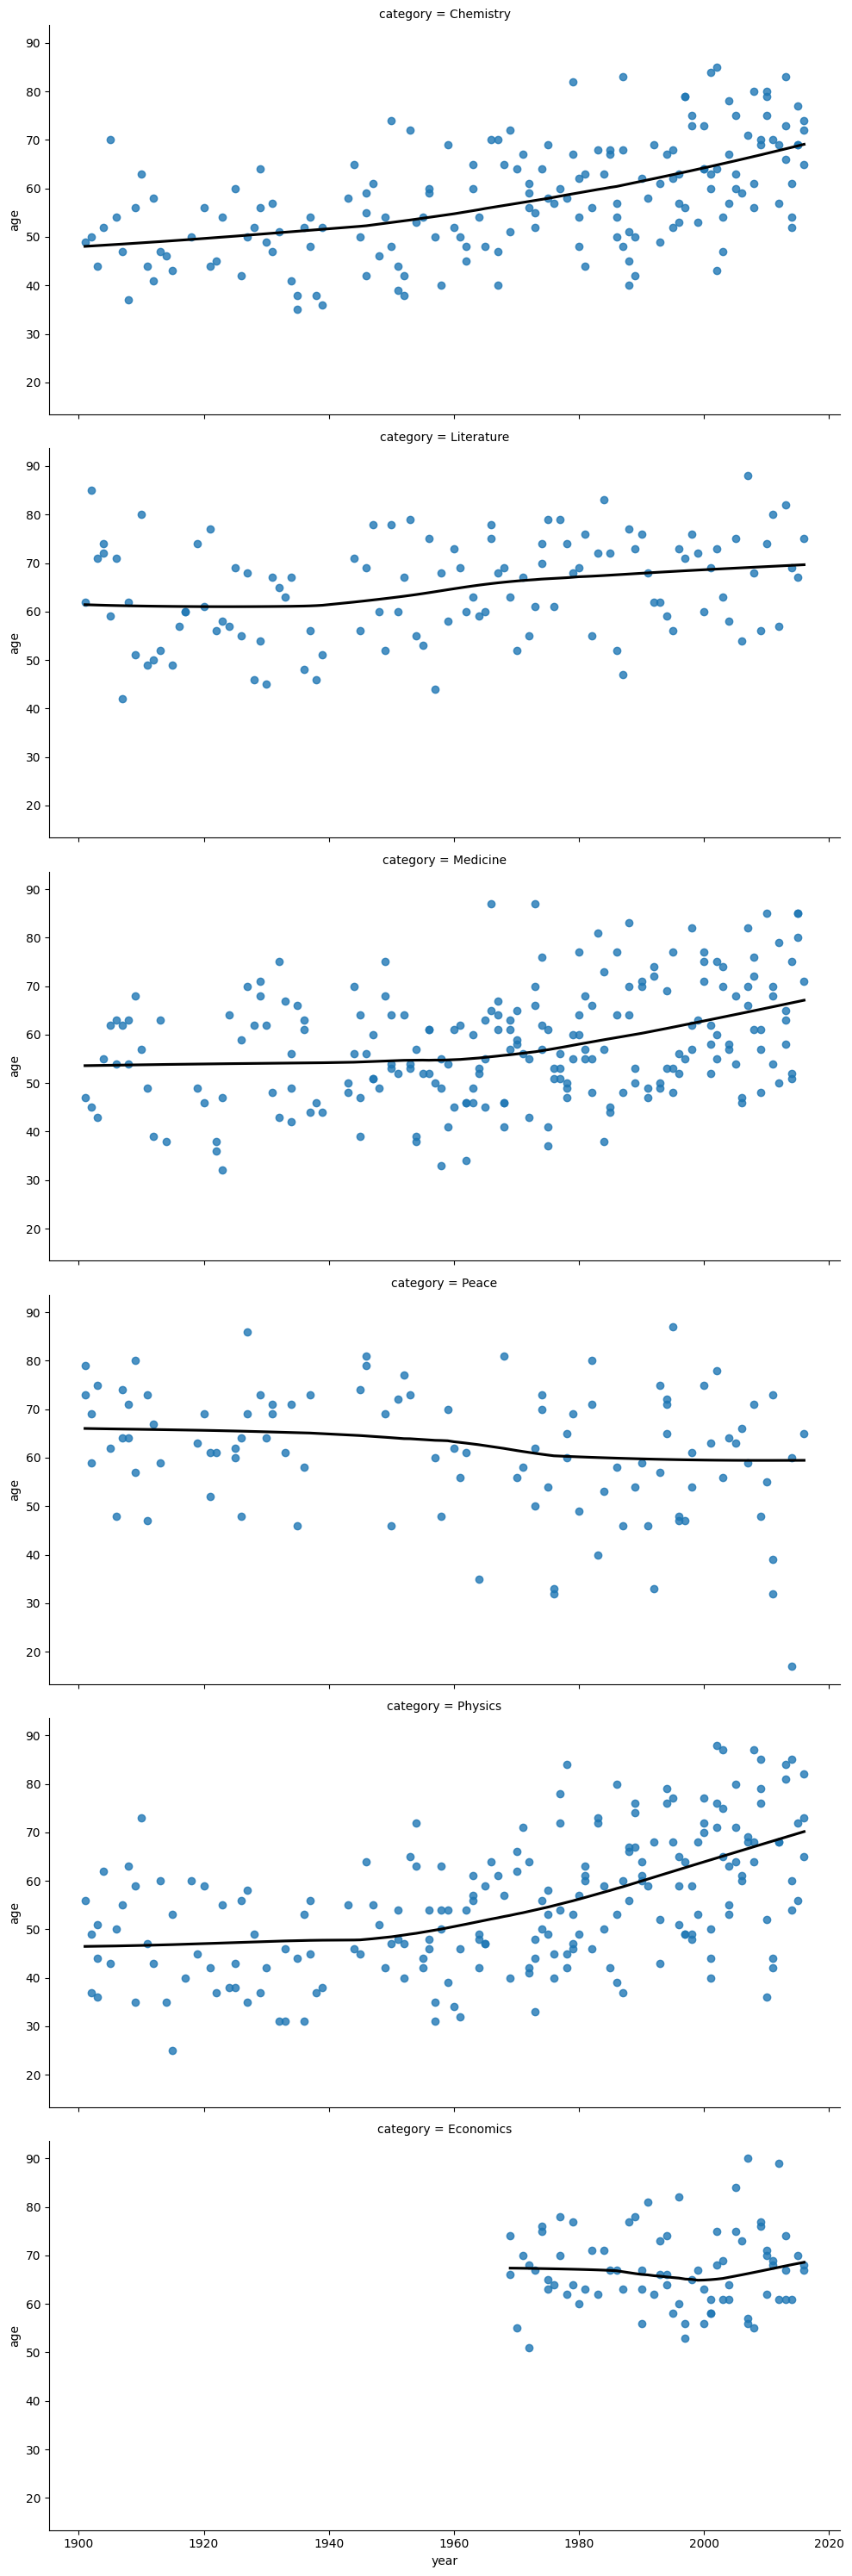

In [ ]:
sns.lmplot(
    x = 'year',
    y = 'age',
    data = nobel,
    lowess = True,
    aspect = 2,
    line_kws= {'color': 'black'},
    row = 'category'
)



# Rando de edad de los ganadores en las diferentes categorias

Las categorías en donde la edad necesaria para gnar un premio nobel ha ido en aumento son las siguientes:

-Física
-Química
-Medicina

Y las categorías en donde el rango de edad se manteineo o ha bajado son:

-Paz
-Economía
-Literatura

# Quién es la persona más vieja en ganar el premio nobel y quien es la más joven

In [ ]:
display(nobel.nlargest(1, 'age'))

nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birt_date,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,1917-08-21,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birt_date,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,1997-07-12,17.0
